## Observations and Insights 

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_results = pd.merge(mouse_metadata,study_results, how='outer', on="Mouse ID")

# Display the data table for preview

combined_mouse_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count =  combined_mouse_results['Mouse ID'].count()
mouse_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dup_idtp = combined_mouse_results
mouse_dup_idtp = mouse_dup_idtp.sort_values(by=['Mouse ID','Timepoint'],ascending=False)
mouse_dup_idtp = mouse_dup_idtp.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='first')
mouse_dup_idtp


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1892,z969,Naftisol,Male,9,30,45,73.867845,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1888,z969,Naftisol,Male,9,30,25,63.145652,2
...,...,...,...,...,...,...,...,...
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
456,a203,Infubinol,Female,20,23,10,51.852437,1
455,a203,Infubinol,Female,20,23,5,48.508468,0


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 



In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dups_of_df = mouse_dup_idtp
mouse_dup_idtp = mouse_dup_idtp.sort_values(by=['Mouse ID','Timepoint'],ascending=False)
dups_of_df = dups_of_df.drop_duplicates(subset='Mouse ID',keep='first')
dups_of_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1892,z969,Naftisol,Male,9,30,45,73.867845,4
1882,z795,Naftisol,Female,13,29,45,65.741070,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
84,z578,Ramicane,Male,11,16,45,30.638696,0
1862,z435,Propriva,Female,12,26,10,48.710661,0


In [5]:
# Checking the number of mice in the clean DataFrame.
count_mouseid = dups_of_df['Mouse ID']
count_mouseid = count_mouseid.count()
count_mouseid_tp = mouse_dup_idtp['Mouse ID']
count_mouseid_tp = count_mouseid_tp.count()

print('Number of mice in dataframe with removed duplicates of Mouse ID and Timepoint:', count_mouseid_tp)
print('Number of mice in dataframe with removed duplicates of Mouse ID:', count_mouseid)

Number of mice in dataframe with removed duplicates of Mouse ID and Timepoint: 1888
Number of mice in dataframe with removed duplicates of Mouse ID: 249


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen_df = dups_of_df[["Drug Regimen",'Tumor Volume (mm3)']]
drug_regimen_df.head()

drug_regimen_mean = drug_regimen_df.groupby('Drug Regimen').mean()
drug_regimen_mean.rename(columns={'Tumor Volume (mm3)':'Mean'},inplace=True)
drug_regimen_median = drug_regimen_df.groupby('Drug Regimen').median()
drug_regimen_median.rename(columns={'Tumor Volume (mm3)':'Median'},inplace=True)
main_stat_data = pd.merge(drug_regimen_mean, drug_regimen_median,left_on=['Drug Regimen'],right_on=['Drug Regimen'])

drug_regimen_var = drug_regimen_df.groupby('Drug Regimen').var()
drug_regimen_var.rename(columns={'Tumor Volume (mm3)':'Variance'},inplace=True)
main_stat_data = pd.merge(main_stat_data, drug_regimen_var,left_on=['Drug Regimen'],right_on=['Drug Regimen'])


drug_regimen_std = drug_regimen_df.groupby('Drug Regimen').std()
drug_regimen_std.rename(columns={'Tumor Volume (mm3)':'STD'},inplace=True)
main_stat_data = pd.merge(main_stat_data, drug_regimen_std,left_on=['Drug Regimen'],right_on=['Drug Regimen'])


drug_regimen_sem = drug_regimen_df.groupby('Drug Regimen').sem()
drug_regimen_sem.rename(columns={'Tumor Volume (mm3)':'SEM'},inplace=True)
main_stat_data = pd.merge(main_stat_data, drug_regimen_sem,left_on=['Drug Regimen'],right_on=['Drug Regimen'])

main_stat_data



,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_df = dups_of_df[["Drug Regimen",'Tumor Volume (mm3)']]
drug_regimen_df = drug_regimen_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

drug_regimen_df

Tumor Volume (mm3)                                            
                           mean     median         var        std       sem
Drug Regimen                                                               
Capomulin             36.667568  38.125164   32.663378   5.715188  1.143038
Ceftamin              57.753977  59.851956   69.982735   8.365568  1.673114
Infubinol             58.178246  60.165180   74.010875   8.602957  1.720591
Ketapril              62.806191  64.487812   98.921330   9.945920  1.989184
Naftisol              61.205757  63.283288  106.029927  10.297083  2.059417
Placebo               60.508414  62.030594   78.759797   8.874672  1.774934
Propriva              56.736964  55.841410   69.349002   8.327605  1.665521
Ramicane              36.191390  36.561652   32.166354   5.671539  1.134308
Stelasyn              61.001707  62.192350   90.331586   9.504293  1.940056
Zoniferol             59.181258  61.840058   76.862027   8.767099  1.753420

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

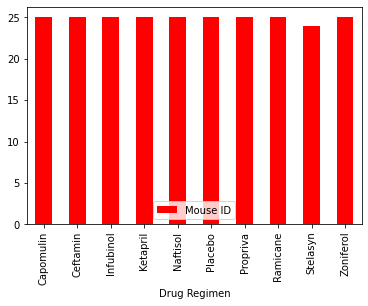

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
unique_mice_tested = dups_of_df[['Drug Regimen','Mouse ID']]
unique_mice_tested = unique_mice_tested.groupby('Drug Regimen').count()
unique_mice_tested.plot(kind='bar',facecolor='red')



<AxesSubplot:ylabel='Mouse ID'>

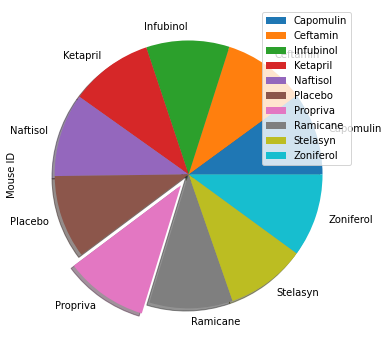

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



<AxesSubplot:ylabel='Drug Regimen'>

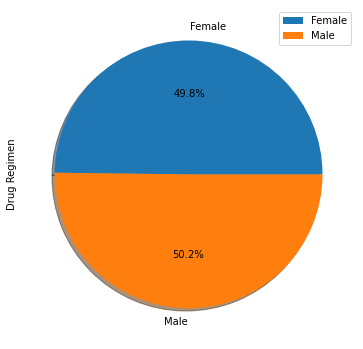

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
unique_mice_sex = dups_of_df[['Drug Regimen','Sex']]
unique_mice_sex = unique_mice_sex.groupby('Sex').count()
unique_mice_sex.plot.pie(y='Drug Regimen', figsize=(6, 40),autopct='%1.1f%%',shadow=True)



<AxesSubplot:ylabel='Drug Regimen'>

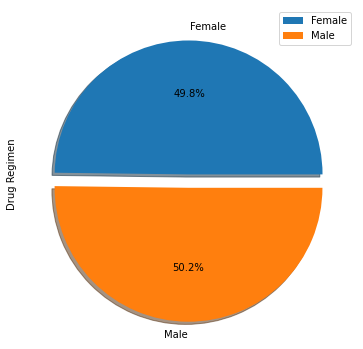

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode=(0,0.1)
unique_mice_sex.plot.pie(y='Drug Regimen', figsize=(6, 40),autopct='%1.1f%%',explode=explode,shadow=True)


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
